1.从argoverse获取主车周围HD地图相关元素
2.从数据获取Agent、Obstacle历史轨迹和Agent未来轨迹ground truth

  0%|          | 0/14 [00:00<?, ?it/s]

/root/VectorNet/mydata/test/11800.csv


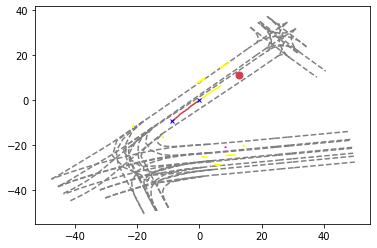

<Figure size 576x432 with 0 Axes>

  0%|          | 0/14 [00:00<?, ?it/s]

/root/VectorNet/mydata/train/11800.csv


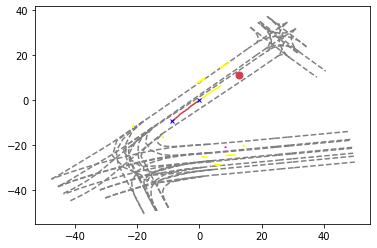

<Figure size 576x432 with 0 Axes>

  0%|          | 0/14 [00:00<?, ?it/s]

/root/VectorNet/mydata/val/11800.csv


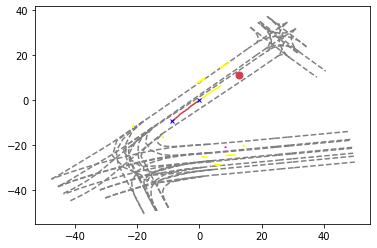

<Figure size 576x432 with 0 Axes>

  0%|          | 0/14 [00:00<?, ?it/s]


: 

In [1]:
%reload_ext autoreload
%autoreload 2
from utils.feature_utils import (
    compute_feature_for_one_seq,
    encode_features,
    save_features,
)
from argoverse.data_loading.argoverse_forecasting_loader import (
    ArgoverseForecastingLoader,
)
from argoverse.map_representation.map_api import ArgoverseMap
import os
from utils.config import (
    DATA_DIR,
    OBS_LEN,
    LANE_RADIUS,
    OBJ_RADIUS,
    INTERMEDIATE_DATA_DIR,
)
from tqdm import tqdm

if __name__ == "__main__":
    am = ArgoverseMap()

    for folder in os.listdir(DATA_DIR):
        arg_for_loader = ArgoverseForecastingLoader(
            os.path.join(DATA_DIR, folder)
        )

        norm_center = {}
        for name in tqdm(arg_for_loader.seq_list):
            print(name)
            path, name = os.path.split(name)
            name, ext = os.path.splitext(name)
            agent_feature, obj_feature_list, lane_feature_list, norm_center = (
                compute_feature_for_one_seq(
                    arg_for_loader.seq_df,
                    am,
                    OBS_LEN,
                    LANE_RADIUS,
                    OBJ_RADIUS,
                    viz=True,
                    mode="nearby",
                )
            )

            df = encode_features(
                agent_feature, obj_feature_list, lane_feature_list
            )
            save_features(
                df,
                name,
                os.path.join(INTERMEDIATE_DATA_DIR, f"{folder}_intermediate"),
            )